In [31]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.model_selection
from sklearn import linear_model
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [8]:
df_train = pd.read_csv("data/train_dummies.csv")
df_train.head()

,id,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_unknown,habitat_w,season_a,season_s,season_u,season_w
0,1811010,p,-1.024028,-0.888352,-1.203608,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,191056,p,-0.568891,1.511866,-0.631684,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2024467,p,-0.596800,-0.510540,-0.684800,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2317180,p,-0.528100,0.804394,-0.540275,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2231687,e,-0.279062,-0.369787,-0.650213,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
X = df_train[df_train.columns[2:]]
y = df_train["class"]
y = y.where(y == "e", 1)
y = y.where(y == 1, 0)

X.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_unknown,cap-shape_x,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_unknown,habitat_w,season_a,season_s,season_u,season_w
0,-1.024028,-0.888352,-1.203608,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.568891,1.511866,-0.631684,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.596800,-0.510540,-0.684800,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-0.528100,0.804394,-0.540275,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.279062,-0.369787,-0.650213,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [10]:
y[:5]

0    1
1    1
2    1
3    1
4    0
Name: class, dtype: object

In [11]:
X.shape[1]

125

In [12]:
df_val = pd.read_csv("data/val_dummies.csv")
X_val = df_val[df_val.columns[2:]]
y_val = df_val["class"]
y_val = y_val.where(y_val == "e", 1)
y_val = y_val.where(y_val == 1, 0)

X_val.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_s,cap-shape_unknown,cap-shape_x,cap-surface_f,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_unknown,habitat_w,season_a,season_s,season_u,season_w
0,0.259804,3.537976,-0.492100,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.693409,-0.103096,-0.530393,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.545275,-0.084576,-0.499512,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.899510,-0.673518,-1.078847,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.167488,-1.021698,0.245349,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
set(X.columns) - set(X_val.columns)

{'cap-shape_k',
 'gill-spacing_w',
 'has-ring_10.3',
 'has-ring_a',
 'has-ring_d',
 'has-ring_e',
 'has-ring_f has-ring',
 'has-ring_g',
 'has-ring_h',
 'has-ring_i',
 'has-ring_k',
 'has-ring_l',
 'has-ring_m',
 'has-ring_n',
 'has-ring_o',
 'has-ring_p',
 'has-ring_r',
 'has-ring_w',
 'has-ring_z',
 'ring-type_n',
 'spore-print-color_b',
 'spore-print-color_h',
 'spore-print-color_o',
 'stem-color_c',
 'stem-root_e'}

In [24]:
X = df_train[X_val.columns]

### Load Dataset into Dataloader

In [25]:
X_train_tensor = torch.tensor(X.values.astype(np.float32))
X_val_tensor = torch.tensor(X_val.values.astype(np.float32))
y_train_tensor = torch.tensor(y.values.astype(np.float32))
y_val_tensor = torch.tensor(y_val.values.astype(np.float32))

In [26]:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 1024
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

### Trying out Logistic Regression

In [27]:
input_size = X_train_tensor.shape[1]

model = nn.Sequential(
    nn.Linear(input_size, 1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=100, out_features=1, bias=True)
  (1): Sigmoid()
)

In [28]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [29]:
torch.manual_seed(1)
num_epochs = 200
n_train = X_train_tensor.shape[0]
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, X_val_tensor, y_val_tensor)

Text(0.5, 0, 'Epochs')

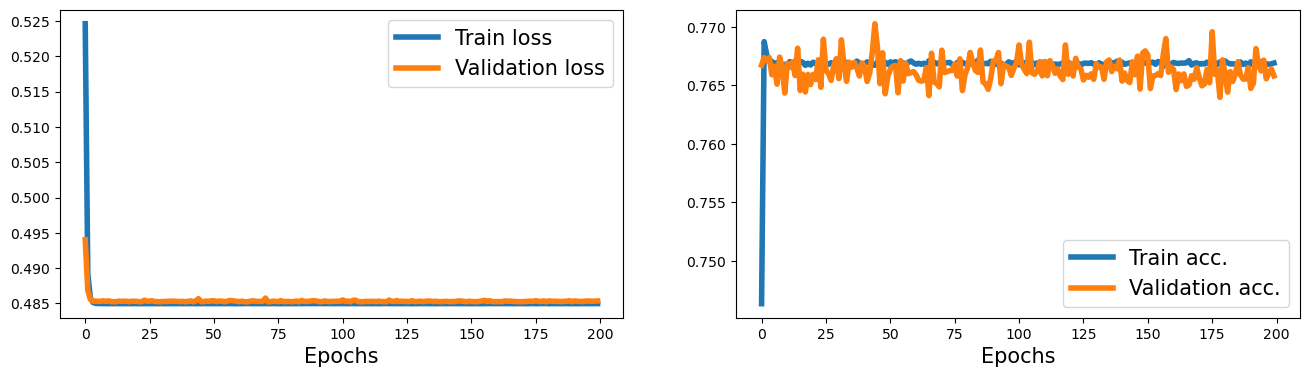

In [32]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

In [33]:
torch.save(model, 'lr_model.pth')

# Use a DNN model

In [34]:
model_dnn = nn.Sequential(
    nn.Linear(input_size, 120),
    nn.ReLU(),
    nn.Linear(120, 60),
    nn.ReLU(),
    nn.Linear(60, 20),
    nn.ReLU(),
    nn.Linear(20, 1),
    nn.Sigmoid()
)

model_dnn

Sequential(
  (0): Linear(in_features=100, out_features=120, bias=True)
  (1): ReLU()
  (2): Linear(in_features=120, out_features=60, bias=True)
  (3): ReLU()
  (4): Linear(in_features=60, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
  (7): Sigmoid()
)